# Information Visualization
## Project Introduction
    In this project, we reproduced a diagram that had been publicly shared in academic papers. After copying, we analyze the charts according to the principles and guidelines taught in class. Based on the analysis, we also proposed changes to make the visualization more efficient and clear.
## Team Members

|College        |  Name    |       E-mail      |
|------------------|-----------|------------------------|
|Lanzhou university|Yixin Zhang|zhangyixin19@lzu.edu.cn |
|Lanzhou university|Shuaike Xu |  xushk2019@lzu.edu.cn  |
|Lanzhou university|Zeqing Qiu |  qiuzq2019@lzu.edu.cn  |

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
import random

In [2]:
num = 1356

In [3]:
maxdatadf = pd.read_csv("maxdata.csv")
maxdata = list(maxdatadf["0"]) # Import maxdata.

In [4]:
mindata = maxdata.copy()
for i in range(len(mindata)):
    sep = random.randint(70,90)
    mindata[i] = mindata[i]-sep
# Create two minimum values similar to the original image.
mindata[100] = -100
mindata[670]= -110 

In [5]:
# Define the function that creates Figure a
def hourly_sea_level(ax):
    
    sep = -60
    seplist=[]
    step = math.ceil((num+96)/6) # Integer up the result and assign it to step.
    for i in range(7):
        seplist.append(sep)
        sep+=step
    
    # Take a 20-year interval and use it later for set_xticklabels.
    yearlist = [1900+i*20 for i in range(0,7)] 
    # The interval is 20 and is later used for set_yticks.
    ylist = [i*20 for i in range(-5,3)] 
    
    ax.plot([[i for i in range(num)],[i for i in range(num)]],[maxdata,mindata],c="#1f77b4")
    ax.plot(0,0,c="#1f77b4",label="hourly sea level")
    ax.plot([0,num],[-43,-25],c='black',label="linear trend") # The figure sets 'linear trend' to black, but we will change it.
    # Using 'axhline' to generate a dotted line representing '35 cm above MHHW'.
    ax.axhline(y=35,ls="--",c="black",label="35 cm above MHHW")
    ax.plot(maxdata.index(max(maxdata)),max(maxdata)+1,"o",c="darkorange",label="highest recorded") # Darkorange is not enough bold.

    ax.set_xticks(seplist)
    ax.set_xticklabels(yearlist)
    ax.set_xlim(seplist[0],seplist[-1])
    ax.set_ylim(-110,50)
    ax.set_yticks(ylist)
    ax.set_ylabel("cm above MHHW")
    ax.text(-60,53,s="a",fontsize=14)
    ax.set_title("Hourlly sea level: Honolulu Harbor")
    ax.grid()
    ax.legend(framealpha=1,loc="lower right",fontsize=9) # Putting 'Legend' in the bottom right like the original image, but it's bad.

In [6]:
# Define the function that creates Figure b
def exdays(ax):
    yearlist = [i for i in range(1900,2021)]
   
    # Exceedance days are created by assigning values to the data in Figure b
    dayslist = [0 for i in range(1900,2021)]
    dayslist[69]=dayslist[103]=dayslist[85]=dayslist[110]=3
    dayslist[70]=dayslist[75]=dayslist[93]=dayslist[116]=1
    dayslist[104]=2;dayslist[96]=4;dayslist[117]=15
    
    # Draw a bar chart based on the two lists created above.
    ax.bar(yearlist,dayslist,width=1,label="1905-2016")
    ax.bar(2017,15,color="darkorange",width=1,label="2017")
    ax.text(1900,18,s="b",fontsize=14) # Add diagram serial number.
    ax.set_xlim(1900,2020)
    ax.set_ylim(0,17)
    
    ax.grid()
    ax.legend()
    ax.set_ylabel("${N_{xd}}$")
    ax.set_title("Exceedance days per year > 35cm above MHHW")
    

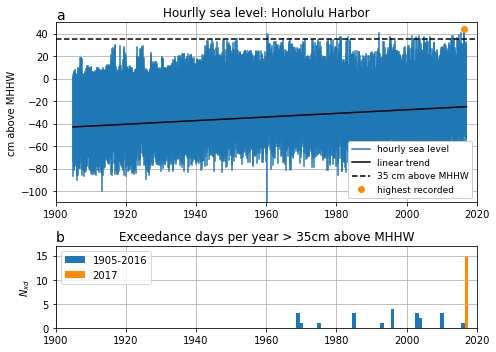

In [7]:
fig,ax = plt.subplots(2,1,figsize = (7,5),gridspec_kw = {'height_ratios':[2.2, 1]})

hourly_sea_level(ax[0])
exdays(ax[1])
plt.tight_layout()
plt.show()

Below is the original image, but due to the lack of raw data, we can only reproduce the general trend.

![this is an image](pics/old.png)

# Improvement plan

Changed the original chart to a line chart so that the data are clearer.

Legend blocks the content of the chart —— change it to text、annotation.

delete grid.

Change procedual knowledge to red.

Rotate yLabel and add units.



In [8]:
maxdatadf = pd.read_csv("maxdata.csv")
maxdata = list(maxdatadf["0"]) # Import maxdata.
indexlist = []
for i in range(1905,2018):
    for j in range(12):
        indexlist.append(i)
        
maxdatadf = pd.DataFrame([maxdata,mindata],columns=indexlist)
meandata = maxdatadf.T.reset_index().groupby("index").mean()

In [9]:
def opt_hourly_sea_level(ax):
    ax.plot([i for i in range(1905,2018)],list(meandata[0]),c="#00008B",linewidth=3)
    ax.plot([i for i in range(1905,2018)],list(meandata[1]),c="#6495ED",linewidth=3)
    ax.plot([1905,2017],[-43,-25],c="darkorange",lw=2)
    ax.plot(2017,list(meandata[0])[-1],"o",c="r")

    ax.text(2020,-25,"Annual Trend",c="darkorange") 
    ax.text(2020,20,"Mean Max Sea Level",c="#00008B") 
    ax.text(2020,-55,"Mean Min Sea Level",c="#6495ED") 
    ax.text(2017,35,"Highest year\n2017(30.79cm)",c="r",horizontalalignment ="center")

    ax.set_xlim(1900,2020)
    ax.set_ylim(-90,40)

    ax.set_ylabel("Mean\nabove\nMHHW\n(cm)",rotation=360,labelpad=20)
    ax.text(1900,42,s="a",fontsize=14)
    ax.set_title("Yearly sea level: Honolulu Harbor")
     
    # We did not call the 'grid' method to remove the grid.
    
    # Remove the top and right border lines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


In [10]:
def opt_exdays(ax):
    yearlist = [i for i in range(1900,2021)]
    dayslist = [0 for i in range(1900,2021)]
    dayslist[69]=dayslist[103]=dayslist[85]=dayslist[110]=3
    dayslist[70]=dayslist[75]=dayslist[93]=dayslist[116]=1
    dayslist[104]=2;dayslist[96]=4;dayslist[117]=15
    
    ax.bar(yearlist,dayslist,width=1,label="1905-2016")
    # We changed from darkorange to a bold red.
    ax.bar(2017,15,color="r",width=1,label="2017")
    ax.text(1900,18,s="b",fontsize=14)
    ax.text(2017,15.5,"15",color="r",horizontalalignment ="center",verticalalignment ="center")  
    ax.set_xlim(1900,2020)
    ax.set_ylim(0,17)
    
    # We did not call the 'grid' method to remove the grid.
    
    # Remove the top and right border lines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend()   
    # We adjust ylabel to the horizontal direction and attach units.
    ax.set_ylabel("${N_{xd}}$\n(days)",rotation=360,labelpad=20,fontsize=12)
    ax.set_title("Exceedance days per year > 35cm above MHHW")

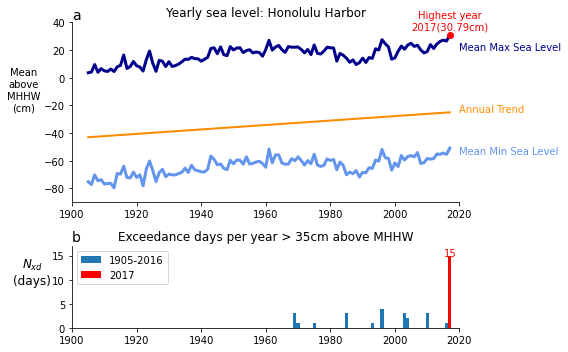

In [11]:
fig,ax = plt.subplots(2,1,figsize = (8,5),gridspec_kw = {'height_ratios':[2.2, 1]})

opt_hourly_sea_level(ax[0])
opt_exdays(ax[1])
plt.tight_layout()
plt.show()